In [74]:
import numpy as np
import pandas as pd
from pandasql import sqldf
import math

In [21]:
df = pd.read_csv("train.csv")

In [22]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [23]:
df.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [114]:
df.shape

(913000, 6)

In [117]:
len(df.item.unique())

50

In [118]:
len(df.store.unique())

10

In [25]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [26]:
from datetime import datetime

In [27]:
df['year'] = df.date.apply(lambda d : datetime.strptime(d, '%Y-%m-%d').year)
df['month'] = df.date.apply(lambda d : datetime.strptime(d, '%Y-%m-%d').month)

In [28]:
df.head()

,date,store,item,sales,year,month
0,2013-01-01,1,1,13,2013,1
1,2013-01-02,1,1,11,2013,1
2,2013-01-03,1,1,14,2013,1
3,2013-01-04,1,1,13,2013,1
4,2013-01-05,1,1,10,2013,1


In [29]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
year      int64
month     int64
dtype: object

In [37]:
df_2017_store1 = df[(df.year == 2017) & (df.store==1)]

In [39]:
df_2017_store1.shape

(18250, 6)

In [40]:
df_2017_store1.head()

,date,store,item,sales,year,month
1461,2017-01-01,1,1,19,2017,1
1462,2017-01-02,1,1,15,2017,1
1463,2017-01-03,1,1,10,2017,1
1464,2017-01-04,1,1,16,2017,1
1465,2017-01-05,1,1,14,2017,1


In [41]:
df_2017_store1.item.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [42]:
query = """
            select
                item,
                month,
                sum(sales) as sales
            from
                df_2017_store1
            group by
                item,month
        """

In [45]:
df_items = sqldf(query,globals())

In [46]:
df_items.head()

,item,month,sales
0,1,1,485
1,1,2,487
2,1,3,561
3,1,4,677
4,1,5,773


In [49]:
query = """
            select 
                item,
                round(avg(sales),2) as avg_sales
            from
                df_items
            group by 
                item
        """

In [50]:
df_items_metric = sqldf(query,globals())
df_items_metric.head()

,item,avg_sales
0,1,674.75
1,2,1818.58
2,3,1137.17
3,4,673.17
4,5,568.67


In [51]:
query = """
            select 
                a.item,
                a.month,
                a.sales,
                a.sales/b.avg_sales as seasonal_index
            from
                df_items a
            join
                df_items_metric b
            on
                a.item = b.item
        """

In [54]:
df_item_si = sqldf(query,globals())

In [128]:
df_item_si[df_item_si['item']==5]

,item,month,sales,seasonal_index
48,5,1,407,0.715705
49,5,2,432,0.759667
50,5,3,512,0.900346
51,5,4,633,1.113124
52,5,5,653,1.148293
53,5,6,686,1.206324
54,5,7,699,1.229184
55,5,8,637,1.120158
56,5,9,589,1.035750
57,5,10,565,0.993546


In [64]:
query = """
            select 
                item,
                AVG(seasonal_index*seasonal_index) - AVG(seasonal_index)*AVG(seasonal_index) as variance
            from
                df_item_si
            group by
                item
        """

In [66]:
df_item_variance = sqldf(query,globals())

In [71]:
df_item_variance.head()

,item,variance
0,1,0.037009
1,2,0.040428
2,3,0.039150
3,4,0.038824
4,5,0.029059


In [75]:
df_item_variance['std'] = df_item_variance.variance.apply(lambda v : math.pow(v,0.5))

In [76]:
df_item_variance.head()

,item,variance,std
0,1,0.037009,0.192377
1,2,0.040428,0.201067
2,3,0.039150,0.197864
3,4,0.038824,0.197038
4,5,0.029059,0.170467


In [77]:
df_item_variance.sort_values('std',ascending=False).head(100)

,item,variance,std
46,47,0.045342,0.212937
26,27,0.044212,0.210267
42,43,0.040691,0.201721
20,21,0.040595,0.201482
11,12,0.040491,0.201223
1,2,0.040428,0.201067
13,14,0.039981,0.199953
36,37,0.039502,0.198751
2,3,0.039150,0.197864
29,30,0.038959,0.197379


In [125]:
import matplotlib.pyplot as plt
def mplot(df,item):
    print(df[df.item==item].head(15))
    df[df.item==item].plot(x='month', y='sales',marker='o')
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
    plt.ylim((400,1500))

     item  month  sales  seasonal_index
552    47      1    463        0.673621
553    47      2    451        0.656162
554    47      3    594        0.864214
555    47      4    744        1.082449
556    47      5    825        1.200297
557    47      6    821        1.194477
558    47      7    911        1.325419
559    47      8    829        1.206116
560    47      9    692        1.006794
561    47     10    702        1.021343
562    47     11    706        1.027163
563    47     12    510        0.742002


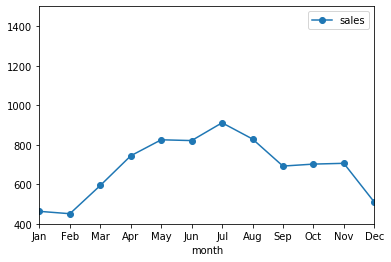

In [126]:
mplot(df_item_si,47)

    item  month  sales  seasonal_index
48     5      1    407        0.715705
49     5      2    432        0.759667
50     5      3    512        0.900346
51     5      4    633        1.113124
52     5      5    653        1.148293
53     5      6    686        1.206324
54     5      7    699        1.229184
55     5      8    637        1.120158
56     5      9    589        1.035750
57     5     10    565        0.993546
58     5     11    575        1.011131
59     5     12    436        0.766701


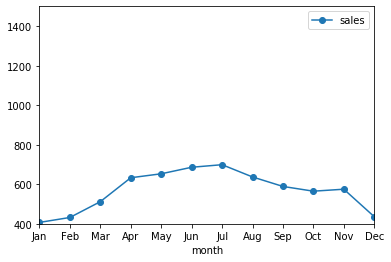

In [127]:
mplot(df_item_si,5)

     item  month  sales  seasonal_index
576    49      1    672        0.739209
577    49      2    621        0.683108
578    49      3    834        0.917411
579    49      4    961        1.057113
580    49      5   1015        1.116513
581    49      6   1051        1.156114
582    49      7   1174        1.291415
583    49      8   1011        1.112113
584    49      9    964        1.060413
585    49     10    927        1.019712
586    49     11    955        1.050513
587    49     12    724        0.796410


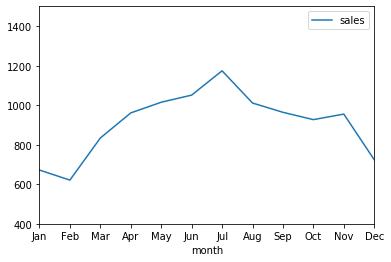

In [113]:
mplot(df_item_si,49)